<a href="https://colab.research.google.com/github/Kermina-Wasfy/facial-emotion-recognition.github.io/blob/main/Facial_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow
#!pip install keras
#!pip install os
#!pip install numpy
#!pip install matplotlib
#!pip install scikit-learn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
IMG_HEIGHT=48
IMG_WIDTH = 48
batch_size=32 #augments 32 images at a time
train_data_dir=r'/content/drive/MyDrive/CK+48/train'
validation_data_dir=r'/content/drive/MyDrive/CK+48/val'
train_datagen = ImageDataGenerator( #this function tells me how to augment the data
    rescale=1/255, #divide all pixels by 255
    rotation_range=40, #0-40% rotation
    width_shift_range=0.2, #shift image horizontally by 0-20%
    height_shift_range=0.2,
    shear_range=0.2, #shear image by 20%
    zoom_range=0.2, #zoom in and out by 20%
    horizontal_flip=True,) #the mirror of the image

validation_datagen = ImageDataGenerator(
         rescale=1/255,  #we only neede to rescale because we need data in its original form
                        #to make sure that the model is working when we validate using it
         rotation_range=40, #0-40% rotation
         width_shift_range=0.2, #shift image horizontally by 0-20%
         height_shift_range=0.2,
         shear_range=0.2, #shear image by 20%
         zoom_range=0.2, #zoom in and out by 20%
         horizontal_flip=True,) #the mirror of the image)

In [ ]:
train_generator = train_datagen.flow_from_directory( # .we use flow from directory
					train_data_dir,                               #because we have alot of images not only 1,this is the
					color_mode='grayscale',                            #function that applies the priv fun rules to the dataset
					target_size=(IMG_HEIGHT, IMG_WIDTH), #we want all images to be of the same size
					batch_size=batch_size,
					class_mode='categorical',
					)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(IMG_HEIGHT, IMG_WIDTH),
							batch_size=batch_size,
							class_mode='categorical',
							)

Found 786 images belonging to 7 classes.
Found 94 images belonging to 7 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

In [ ]:
train_path=r"/content/drive/MyDrive/CK+48/train"
test_path=r"/content/drive/MyDrive/CK+48/test"

num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files) #this function counts the number of files in my training data

num_test_imgs = 0
for root, dirs, files in os.walk(test_path): #this function counts the number of files in my test data
    num_test_imgs += len(files)
epochs=70
history = model.fit(train_generator, validation_data=validation_generator, epochs=epochs,batch_size=32,callbacks=[EarlyStopping(monitor='val_loss', patience=7, verbose=0)])
model.save('emotion_detection_model_100epochs.h5')


Epoch 1/70
25/25 [==============================] - 147s 6s/step - loss: 1.8561 - accuracy: 0.2354 - val_loss: 1.8710 - val_accuracy: 0.1809
Epoch 2/70
25/25 [==============================] - 2s 73ms/step - loss: 1.8262 - accuracy: 0.2214 - val_loss: 1.7919 - val_accuracy: 0.2553
Epoch 3/70
25/25 [==============================] - 2s 80ms/step - loss: 1.7834 - accuracy: 0.2875 - val_loss: 1.6617 - val_accuracy: 0.3191
Epoch 4/70
25/25 [==============================] - 2s 87ms/step - loss: 1.7094 - accuracy: 0.3422 - val_loss: 1.6219 - val_accuracy: 0.3511
Epoch 5/70
25/25 [==============================] - 2s 80ms/step - loss: 1.6031 - accuracy: 0.3448 - val_loss: 1.6128 - val_accuracy: 0.3404
Epoch 6/70
25/25 [==============================] - 2s 71ms/step - loss: 1.5685 - accuracy: 0.3715 - val_loss: 1.6047 - val_accuracy: 0.2872
Epoch 7/70
25/25 [==============================] - 2s 72ms/step - loss: 1.4983 - accuracy: 0.3804 - val_loss: 1.5378 - val_accuracy: 0.4043
Epoch 8/70
25

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


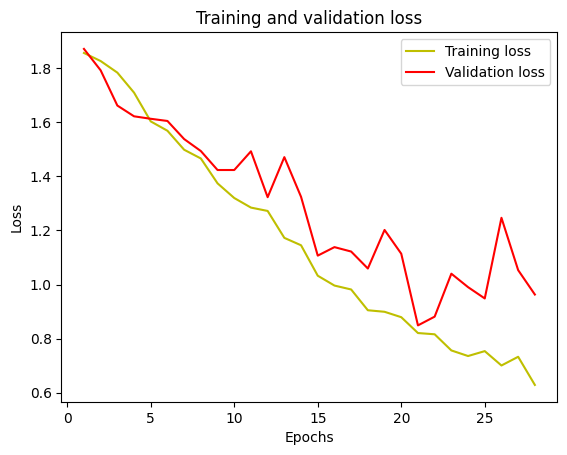

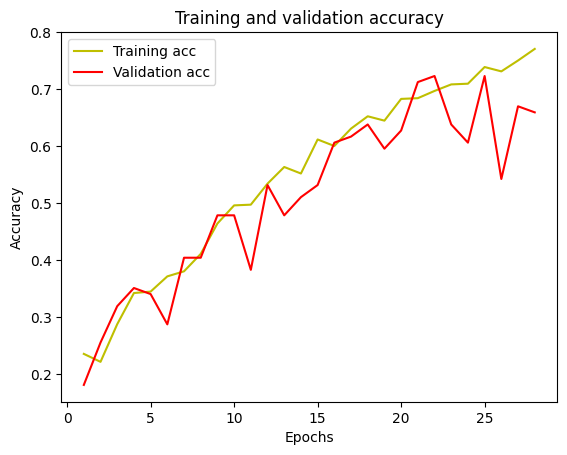

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']

val_acc = history.history['val_accuracy']


plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model


my_model = load_model('emotion_detection_model_100epochs.h5', compile=False)

test_img, test_lbl = validation_generator.__next__()
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))


1/1 [==============================] - 0s 142ms/step
Accuracy =  0.8125


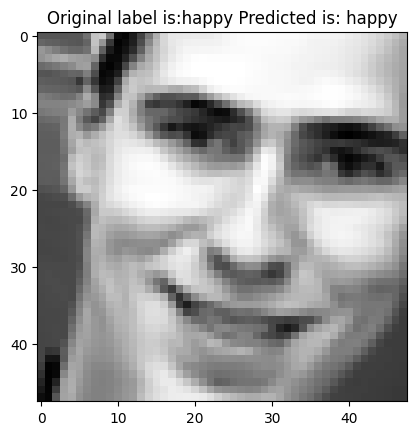

In [ ]:
class_labels=['anger','contempt', 'disgust','fear', 'happy','sadness','surprised']
import random
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()